### Masive Data Assignment
 (second project)
Read, Clean, and prepare the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### omisego_price

#### 1. Read the Data

In [2]:
# Read Bitcoin Cash Price
df = pd.read_csv('../data/raw/omisego_price.csv', parse_dates = ['Date'])
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-09-05,8.68,11.28,7.60,10.98,"111,430,000","852,870,000"
1,2017-09-04,10.55,10.55,7.31,8.78,"159,979,000","1,037,440,000"
2,2017-09-03,10.79,11.37,9.64,10.57,"68,616,800","1,060,760,000"
3,2017-09-02,11.99,11.99,9.96,10.80,"93,561,000","1,178,610,000"
4,2017-09-01,11.73,12.52,11.63,11.97,"91,962,400","1,153,390,000"


In [3]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap'], dtype='object')

In [4]:
df.count()

Date          30
Open          30
High          30
Low           30
Close         30
Volume        30
Market Cap    30
dtype: int64

as we can see we have in this file 7 columns and each column has 30 cells

In [5]:
df.describe()

,Open,High,Low,Close
count,30.000000,30.000000,30.000000,30.000000
mean,7.774667,8.550333,7.093667,8.060000
std,2.364860,2.340497,2.171231,2.222332
min,2.700000,3.250000,2.630000,3.150000
25%,6.895000,7.587500,6.182500,7.072500
50%,8.230000,8.455000,7.325000,8.275000
75%,8.655000,9.582500,8.122500,8.847500
max,11.990000,12.520000,11.630000,11.970000


In [6]:
# General Information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
Date          30 non-null datetime64[ns]
Open          30 non-null float64
High          30 non-null float64
Low           30 non-null float64
Close         30 non-null float64
Volume        30 non-null object
Market Cap    30 non-null object
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.8+ KB


In [7]:
#check if the dataset is duplicated
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool

as we can see the data fram has 7 columns. each column has 30 cells, and there is no missing data,but we hve to convert the dt type of the variables "Volume" and "Market Cap" to number


In [15]:
# Count missing data in each column
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

we can see there is no missing data 

### cleaning Data


In [16]:
print('Volume Data Type :', type(df.Volume[0]))
print('Market Cap Data Type :', type(df['Market Cap'][0]))

Volume Data Type : <class 'numpy.int64'>
Market Cap Data Type : <class 'numpy.float64'>


In [17]:
def convert_to_number(x):
    try:
        return int(x.replace(',',''))
    except:
        return x

df.Volume = df.Volume.apply(convert_to_number)
df['Market Cap'] = df['Market Cap'].apply(lambda x: float(str(x).replace(',','')))

df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,30.000000,30.000000,30.000000,30.000000,3.000000e+01,3.000000e+01
mean,7.774667,8.550333,7.093667,8.060000,9.095355e+07,7.643136e+08
std,2.364860,2.340497,2.171231,2.222332,5.804909e+07,2.325408e+08
min,2.700000,3.250000,2.630000,3.150000,2.291500e+07,2.651380e+08
25%,6.895000,7.587500,6.182500,7.072500,5.043160e+07,6.782295e+08
50%,8.230000,8.455000,7.325000,8.275000,7.993950e+07,8.092780e+08
75%,8.655000,9.582500,8.122500,8.847500,1.096285e+08,8.504648e+08
max,11.990000,12.520000,11.630000,11.970000,2.346930e+08,1.178610e+09


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
Date          30 non-null datetime64[ns]
Open          30 non-null float64
High          30 non-null float64
Low           30 non-null float64
Close         30 non-null float64
Volume        30 non-null int64
Market Cap    30 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.8 KB


In [19]:
# correlation between columns
correlation = df.corr(method="pearson")
correlation

,Open,High,Low,Close,Volume,Market Cap
Open,1.000000,0.937069,0.951910,0.906109,0.000110,0.999999
High,0.937069,1.000000,0.924420,0.983636,0.266186,0.937024
Low,0.951910,0.924420,1.000000,0.938397,-0.043909,0.951953
Close,0.906109,0.983636,0.938397,1.000000,0.206055,0.906085
Volume,0.000110,0.266186,-0.043909,0.206055,1.000000,0.000063
Market Cap,0.999999,0.937024,0.951953,0.906085,0.000063,1.000000


let's plot data between Market Cap and other variable, then see the relation between the data


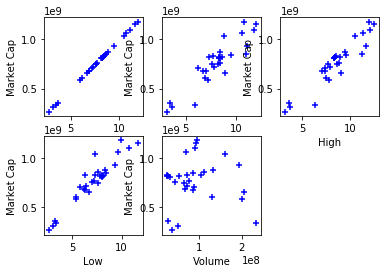

In [20]:
import matplotlib.pyplot as plt
def plot_data(xdata,ydata,xlabel):
    plt.scatter(xdata,ydata,marker='+',color='blue')
    plt.ylabel('Market Cap')
    plt.xlabel(xlabel)
        
plt.subplot(2,3,1)
plot_data(df.Open, df['Market Cap'],'Open')
plt.subplot(2,3,2)
plot_data(df.Close, df['Market Cap'],'Close')
plt.subplot(2,3,3)
plot_data(df.High, df['Market Cap'],'High')
plt.subplot(2,3,4)
plot_data(df.Low, df['Market Cap'],'Low')
plt.subplot(2,3,5)
plot_data(df.Volume, df['Market Cap'],'Volume')

In [21]:
from sklearn import linear_model

model       = linear_model.LinearRegression()
Open        = df[['Open']]
Market_Cap  = df['Market Cap']

In [22]:
# train data using linear regression 
model.fit(Open, Market_Cap)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
# Model Score
model.score(Open, Market_Cap)

0.99999875359317

#### 4. Data Visualization

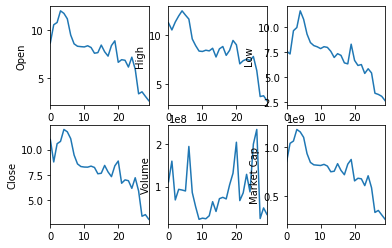

In [24]:
%matplotlib inline
    
plt.subplot(2,3,1)
plt.ylabel('Open')
df.Open.plot()

plt.subplot(2,3,2)
plt.ylabel('High')
df.High.plot()

plt.subplot(2,3,3)
plt.ylabel('Low')
df.Low.plot()

plt.subplot(2,3,4)
plt.ylabel('Close')
df.Close.plot()

plt.subplot(2,3,5)
plt.ylabel('Volume')
df.Volume.plot()

plt.subplot(2,3,6)
plt.ylabel('Market Cap')
df['Market Cap'].plot()